# Logistic Classifier for MNIST data

## Preliminaries

### Imports

In [1]:
import os
import pickle 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

%matplotlib inline
import gzip

import sys
sys.path.append("../..")
from E4525_ML import mnist
from E4525_ML import plots
from E4525_ML.multiclass_logistic import LogisticGDClassifier

### Data

In [2]:
data_dir=r"../../raw/MNIST/"

In [3]:
model_dir=f"../../data/models"

In [4]:
    images_filename=data_dir+"train-images-idx3-ubyte.gz"
    labels_filename=data_dir+"train-labels-idx1-ubyte.gz"

    test_images_filename=data_dir+"t10k-images-idx3-ubyte.gz"
    test_labels_filename=data_dir+"t10k-labels-idx1-ubyte.gz"

    images=mnist.read_images(images_filename)
    labels=mnist.read_labels(labels_filename)
    
    test_images=mnist.read_images(test_images_filename)
    test_labels=mnist.read_labels(test_labels_filename)
    
    print(images.shape,labels.shape)

(60000, 28, 28) (60000,)


In [5]:
nimages=images.shape[0]
nrows=images.shape[1]
ncols=images.shape[2]
print(nimages,nrows,ncols)

60000 28 28


## Logistic Classifier

In [6]:
model=LogisticGDClassifier()
#model=LogisticRegression()

In [7]:
model.fit(images.reshape(nimages,-1),labels,test_images.reshape(len(test_images),-1),test_labels)
Y_pred=model.predict(images.reshape(nimages,-1))
"Training accuracy",np.mean(Y_pred==labels)

	 0 Loss = 2425.3714664364593 Train_Accuracy 0.073 Evaluation Loss = 2435.8463863311763 Accuracy = 0.061
	 10 Loss = 230.15127388544113 Train_Accuracy 0.94 Evaluation Loss = 316.1239802601995 Accuracy = 0.916
	 20 Loss = 277.8149254533495 Train_Accuracy 0.928 Evaluation Loss = 259.058706757233 Accuracy = 0.929
	 30 Loss = 214.23503768952358 Train_Accuracy 0.939 Evaluation Loss = 254.80896049617814 Accuracy = 0.927
	 40 Loss = 224.23128709303217 Train_Accuracy 0.929 Evaluation Loss = 271.0707757534591 Accuracy = 0.919
	 50 Loss = 252.62421528753515 Train_Accuracy 0.93 Evaluation Loss = 298.2575296139845 Accuracy = 0.919
	 60 Loss = 246.94416494298088 Train_Accuracy 0.936 Evaluation Loss = 266.9918525089575 Accuracy = 0.923
	 70 Loss = 266.364794204735 Train_Accuracy 0.906 Evaluation Loss = 265.6037833280195 Accuracy = 0.933
	 80 Loss = 224.28485622031525 Train_Accuracy 0.939 Evaluation Loss = 239.04354161375903 Accuracy = 0.923
	 90 Loss = 234.94205028195034 Train_Accuracy 0.939 Evaluat

/home/manel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('Training accuracy', 0.9342)

In [8]:
Y_pred=model.predict(test_images.reshape((len(test_images),-1)))
"Test Accuracy",np.mean(Y_pred==test_labels)


/home/manel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('Test Accuracy', 0.9237)

In [9]:
# here model is the latest fit model (N=51000)
loadings=model.W.reshape(-1,nrows,ncols)
#loadings=model.coef_
loadings.shape

(10, 28, 28)

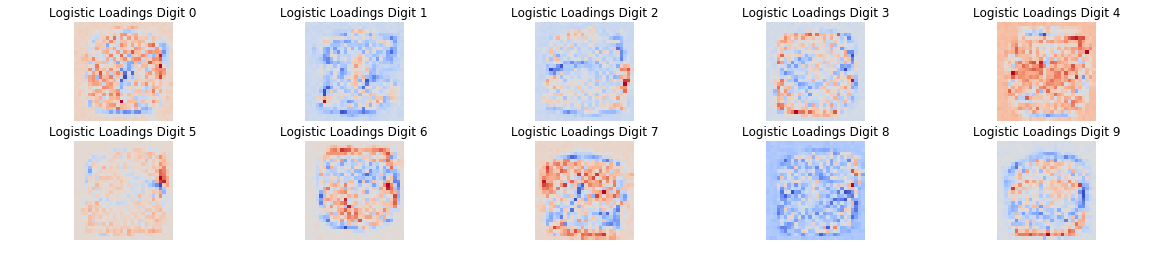

In [12]:
# Two subplots, unpack the axes array immediately
f, axes = plt.subplots(2, 5, sharey=True,figsize=(20,4))
for d,ax in enumerate(axes.ravel()):
    ax.set_title('Logistic Loadings Digit {0}'.format(d))
    ax.imshow(loadings[d].reshape(nrows,ncols), cmap='coolwarm')
    ax.axis("off")

### Number of trained parameters

The number of trainable parameters is dominated by the loadings.

In [20]:
loadings.size

7840

In [21]:
model.b.size

10

In [24]:
total_parameters=loadings.size+model.b.size
print("total trainable parameters",total_parameters)

total trainable parameters 7850


### Save Model

In [11]:
model_filename=model_dir+"/MNIST_logistic.p"
file=open(model_filename,"wb")
pickle.dump(model,file)